In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers
AUTOTUNE = tf.data.experimental.AUTOTUNE

print('tensorflow version: {}'.format(tf.__version__))
print(tf.config.list_physical_devices())
print(tf.config.list_physical_devices('GPU'))

tensorflow version: 2.1.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'), PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# https://inpages.tistory.com/155
# to avoid GPU full memory error
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#         tf.config.experimental.set_memory_growth(gpus[0], True)
        tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1800)])
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Visible devices must be set at program startup
        print(e)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs


In [3]:
data_dir = PATH = './dataset/'

In [4]:
print_steps = 1
val_epoch = 1

batch_size = 2
max_epochs = 40
learning_rate = 1e-4
IMG_SIZE = 224

PATH = data_dir

In [5]:
def load(image_file, label):
    
    image = tf.io.read_file(image_file)
    image = tf.image.decode_jpeg(image)
    image = tf.cast(image, tf.float32)

    return image, label

In [6]:
def resize(input_image, height, width):
    input_image = tf.image.resize(input_image,(height,width),name="resize_HeightWidth")
    return input_image

In [7]:
def colorJitter(input_image):
    # brightness, contrast, saturation, hue
    input_image = tf.image.random_brightness(input_image, 0.2, seed=None)
    input_image = tf.image.random_contrast(input_image, 0.5, 1, seed=None)
    # input_image = tf.image.random_saturation(input_image, 0.1, 0.5, seed=None)
    input_image = tf.image.random_hue(input_image, 0.1, seed=None)
    return input_image

========= for test =======

In [8]:
image, label = load(os.path.join(PATH,'free/4be8d95e-edfa-11ea-a8b8-16f63a1aa8c9.jpg'), 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[ 1.1235863  2.1235862  3.1235862]
  [ 4.123586   5.123586   6.123586 ]]

 [[ 7.123586   8.123587   9.123587 ]
  [10.123587  11.123587  12.123587 ]]], shape=(2, 2, 3), dtype=float32)


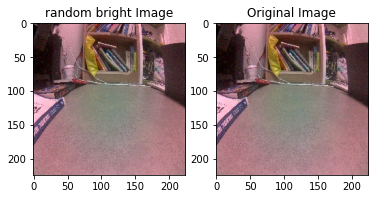

In [9]:
x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
     [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
print(tf.image.random_brightness(x, 0.2))

plt.figure()
plt.subplot(121)
plt.title("random bright Image")
plt.imshow(tf.image.random_brightness(image, 0.2)/255.0)
plt.subplot(122)
plt.title("Original Image")
plt.imshow(image/255.0)
plt.show()

tf.Tensor(
[[[ 2.4232075  3.4232075  4.4232073]
  [ 4.4744024  5.4744024  6.4744024]]

 [[ 6.5255976  7.5255976  8.525598 ]
  [ 8.576793   9.576793  10.576793 ]]], shape=(2, 2, 3), dtype=float32)


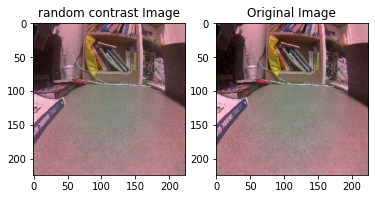

In [10]:
x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
print(tf.image.random_contrast(x, 0.5, 1))

plt.figure()
plt.subplot(121)
plt.title("random contrast Image")
plt.imshow(tf.image.random_contrast(image, 0.5, 1)/255.0)
plt.subplot(122)
plt.title("Original Image")
plt.imshow(image/255.0)
plt.show()

tf.Tensor(
[[[ 2.570717   2.7853587  3.       ]
  [ 5.570717   5.7853584  6.       ]]

 [[ 8.570717   8.785358   9.       ]
  [11.570717  11.785358  12.       ]]], shape=(2, 2, 3), dtype=float32)


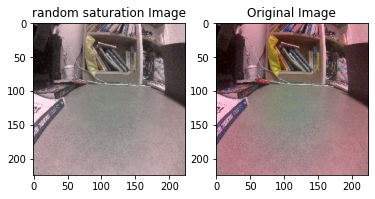

In [11]:
x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
print(tf.image.random_saturation(x, 0.2, 0.5))

plt.figure()
plt.subplot(121)
plt.title("random saturation Image")
plt.imshow(tf.image.random_saturation(image, 0.2, 0.5)/255.0)
plt.subplot(122)
plt.title("Original Image")
plt.imshow(image/255.0)
plt.show()

tf.Tensor(
[[[ 1.059885  1.        3.      ]
  [ 4.059885  4.        6.      ]]

 [[ 7.059885  7.        9.      ]
  [10.059885 10.       12.      ]]], shape=(2, 2, 3), dtype=float32)


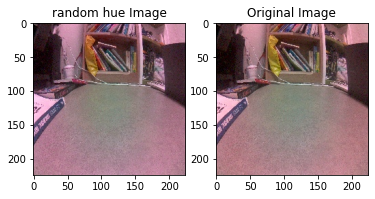

In [12]:
x = [[[1.0, 2.0, 3.0],
      [4.0, 5.0, 6.0]],
    [[7.0, 8.0, 9.0],
      [10.0, 11.0, 12.0]]]
print(tf.image.random_hue(x, 0.1))

plt.figure()
plt.subplot(121)
plt.title("random hue Image")
plt.imshow(tf.image.random_hue(image, 0.1)/255.0)
plt.subplot(122)
plt.title("Original Image")
plt.imshow(image/255.0)
plt.show()

======= end =======

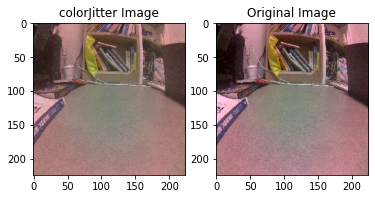

In [13]:
image, label = load(os.path.join(PATH,'free/4be8d95e-edfa-11ea-a8b8-16f63a1aa8c9.jpg'), 0)
plt.figure()
plt.subplot(121)
plt.title("colorJitter Image")
plt.imshow(colorJitter(image)/255.0)
plt.subplot(122)
plt.title("Original Image")
plt.imshow(image/255.0)
plt.show()

In [14]:
# normalizing the images to [-1, 1]
def normalize(input_image):
    input_image = (input_image / 255.0)
    return input_image

In [15]:
def load_image_train(image_file, label):

    ## 코드 시작 ##
    input_image, label = load(image_file,label)
    input_image = resize(input_image, 224, 224)
    input_image = colorJitter(input_image)
    input_image = normalize(input_image)
    ## 코드 종료 ##

    return input_image, label

In [16]:
def load_image_val(image_file, label):

    ## 코드 시작 ##
    input_image, label = load(image_file,label)
    input_image = resize(input_image, 224, 224)
    input_image = normalize(input_image)
    ## 코드 종료 ##

    return input_image, label

데이터 받고 나누기  
https://stackoverflow.com/questions/58402973/how-to-create-train-test-and-validation-splits-in-tensorflow-2-0

In [17]:
def add_label(image_file, label):
    return image_file, label

In [18]:
# train folder에 있는 폴더 이름을 list로 나타냅니다.
# 즉 학습에 사용할 category의 이름을 list로 나타내는 것입니다.
folder_list = [f for f in os.listdir(os.path.join(PATH)) if not f.startswith('.')]
print(folder_list)

['blocked', 'free']


In [19]:
all_dataset = tf.data.Dataset.list_files(               
    os.path.join(PATH, folder_list[0], '*.jpg'))
all_dataset = all_dataset.map(lambda x: add_label(x, 0))
for label, category_name in enumerate(folder_list[1:], 1):
    temp_dataset = tf.data.Dataset.list_files(                         
        os.path.join(PATH, category_name, '*.jpg'))
    temp_dataset = temp_dataset.map(lambda x: add_label(x, label))    
    all_dataset = all_dataset.concatenate(temp_dataset)
print(all_dataset)  

<ConcatenateDataset shapes: ((), ()), types: (tf.string, tf.int32)>


In [20]:
labeled_all_length = [i for i,_ in enumerate(all_dataset)][-1] + 1

all_dataset = all_dataset.shuffle(labeled_all_length)

train_size = int(0.9 * labeled_all_length)

train_dataset = all_dataset.take(train_size)
val_dataset = all_dataset.skip(train_size)
print(train_dataset)
print(val_dataset)
train_length = [i for i,_ in enumerate(train_dataset)][-1] + 1
val_length = [i for i,_ in enumerate(val_dataset)][-1] + 1

print('Original: ', labeled_all_length)
print('Train: ', train_length)
print('Validation :', val_length)

<TakeDataset shapes: ((), ()), types: (tf.string, tf.int32)>
<SkipDataset shapes: ((), ()), types: (tf.string, tf.int32)>
Original:  125
Train:  112
Validation : 13


In [21]:
train_dataset_manually = train_dataset.map(load_image_train,
                                  num_parallel_calls=16)
train_dataset_manually = train_dataset_manually.batch(batch_size)
train_dataset_manually = train_dataset_manually.repeat()

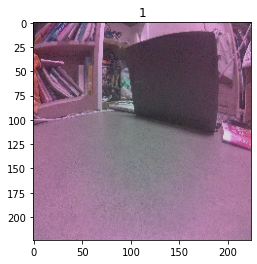

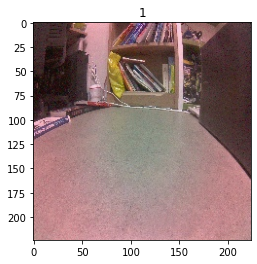

In [22]:
for images, labels in train_dataset_manually.take(1):
    for j in range(2):
        plt.figure()
        plt.imshow(images[j])
        plt.title(labels[j].numpy())
        plt.show()

https://www.tensorflow.org/tutorials/images/data_augmentation

In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [24]:
augmented_train_batches = (
    train_dataset
    # Only train on a subset, so you can quickly see the effect.
    .cache()
    # The augmentation is added here.
    .map(load_image_train, num_parallel_calls=AUTOTUNE)
    .batch(batch_size)
    .prefetch(AUTOTUNE)
) 

In [25]:
validation_batches = (
    val_dataset
    .map(load_image_val, num_parallel_calls=AUTOTUNE)
    .batch(2*batch_size)
)

###train with pretrained model

In [26]:
conv_base = tf.keras.applications.VGG16(weights='imagenet',
                                        include_top=False,
                                        input_shape=(IMG_SIZE, IMG_SIZE, 3))

In [27]:
model = tf.keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())

model.add(tf.keras.layers.Dense(units=256,activation=tf.nn.relu))  # relu
model.add(tf.keras.layers.Dense(units=2,activation=tf.nn.softmax))  # softmax


In [28]:
# training variable 확인
for var in model.trainable_variables:
    print(var.name)

block1_conv1/kernel:0
block1_conv1/bias:0
block1_conv2/kernel:0
block1_conv2/bias:0
block2_conv1/kernel:0
block2_conv1/bias:0
block2_conv2/kernel:0
block2_conv2/bias:0
block3_conv1/kernel:0
block3_conv1/bias:0
block3_conv2/kernel:0
block3_conv2/bias:0
block3_conv3/kernel:0
block3_conv3/bias:0
block4_conv1/kernel:0
block4_conv1/bias:0
block4_conv2/kernel:0
block4_conv2/bias:0
block4_conv3/kernel:0
block4_conv3/bias:0
block5_conv1/kernel:0
block5_conv1/bias:0
block5_conv2/kernel:0
block5_conv2/bias:0
block5_conv3/kernel:0
block5_conv3/bias:0
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


In [29]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [30]:
# training variable 확인
for var in model.trainable_variables:
    print(var.name)

block5_conv1/kernel:0
block5_conv1/bias:0
block5_conv2/kernel:0
block5_conv2/bias:0
block5_conv3/kernel:0
block5_conv3/bias:0
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0


In [31]:
## 코드 시작 ##
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate), 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics = ['accuracy'])
## 코드 종료 ##

In [32]:
checkpoint_path = "./train/exp_pre_trained_practice/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
## 코드 시작 ##
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_best_only=True,save_weights_only=True, verbose=1)
## 코드 종료 ##

In [33]:
aug_history = model.fit(augmented_train_batches, epochs=10, validation_data=validation_batches,callbacks = [cp_callback])

Train for 56 steps, validate for 4 steps
Epoch 1/10
55/56 [============================>.] - ETA: 1s - loss: 0.2384 - accuracy: 0.9091
Epoch 00001: val_loss improved from inf to 0.00902, saving model to ./train/exp_pre_trained_practice/cp.ckpt
56/56 [==============================] - 136s 2s/step - loss: 0.2341 - accuracy: 0.9107 - val_loss: 0.0090 - val_accuracy: 1.0000
Epoch 2/10
55/56 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 1.0000
Epoch 00002: val_loss improved from 0.00902 to 0.00018, saving model to ./train/exp_pre_trained_practice/cp.ckpt
56/56 [==============================] - 52s 928ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 1.7825e-04 - val_accuracy: 1.0000
Epoch 3/10
55/56 [============================>.] - ETA: 0s - loss: 4.9586e-04 - accuracy: 1.0000
Epoch 00003: val_loss improved from 0.00018 to 0.00001, saving model to ./train/exp_pre_trained_practice/cp.ckpt
56/56 [==============================] - 47s 831ms/step - loss: 4.8701e-

In [34]:
tf.saved_model.save(model, './trained_model_200904/') # linux

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./trained_model_200904/assets
